In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_2019 = pd.read_csv("./Resources/2019loans.csv")

In [4]:
df_2020 = pd.read_csv("./Resources/2020Q1loans.csv")

In [5]:
df_2019.select_dtypes("object").apply(pd.Series.nunique, axis=0)


home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              1
initial_list_status     2
application_type        2
hardship_flag           2
debt_settlement_flag    2
dtype: int64

In [6]:
df_2020.select_dtypes("object").apply(pd.Series.nunique, axis=0)

home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              1
initial_list_status     2
application_type        2
hardship_flag           2
debt_settlement_flag    1
dtype: int64

In [7]:
df_2020.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [8]:
df_2019['int_rate'] = pd.Series([round(val, 2) for val in df_2019['int_rate']], index = df_2019.index)
df_2019['int_rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_2019['int_rate']], index = df_2019.index)

In [9]:
df_2019['int_rate'] = (pd.to_numeric(df_2019['int_rate'].str[:-1])
                            .div(100)
                            .mask(df_2019['int_rate'] == '%', 0))

[Text(0, 0, '0.06'),
 Text(1, 0, '0.07'),
 Text(2, 0, '0.08'),
 Text(3, 0, '0.09'),
 Text(4, 0, '0.1'),
 Text(5, 0, '0.11'),
 Text(6, 0, '0.12'),
 Text(7, 0, '0.13'),
 Text(8, 0, '0.14'),
 Text(9, 0, '0.15'),
 Text(10, 0, '0.16'),
 Text(11, 0, '0.17'),
 Text(12, 0, '0.18'),
 Text(13, 0, '0.19'),
 Text(14, 0, '0.2'),
 Text(15, 0, '0.21'),
 Text(16, 0, '0.22'),
 Text(17, 0, '0.23'),
 Text(18, 0, '0.24'),
 Text(19, 0, '0.25'),
 Text(20, 0, '0.26'),
 Text(21, 0, '0.27'),
 Text(22, 0, '0.29'),
 Text(23, 0, '0.31')]

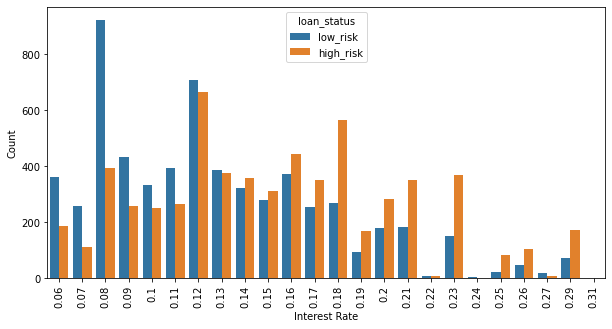

In [10]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x=df_2019['int_rate'].sort_values(), hue=df_2019['loan_status'])
chart.set(xlabel='Interest Rate', ylabel='Count')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\Users\TriciaToffey\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


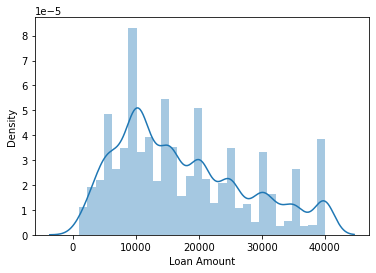

In [11]:
sns.distplot(df_2019['loan_amnt'], hist=True, kde=True, rug=False, norm_hist=True, axlabel='Loan Amount')
plt.show()

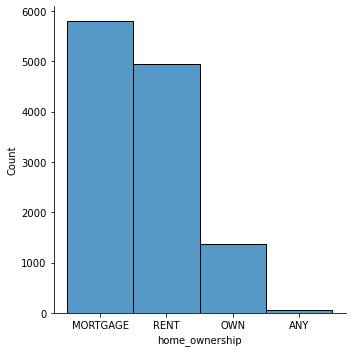

In [12]:
sns.displot(df_2019, x="home_ownership")

In [13]:
df_2019.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [14]:
df_2020.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [15]:
from sklearn import preprocessing

In [16]:
count = 0
for col in df_2019:
    if df_2019[col].dtype == 'object':
        if len(list(df_2019[col].unique())) <=2:
            le = preprocessing.LabelEncoder()
            df_2019[col]=le.fit_transform(df_2019[col])
            count += 1
            print(col)
            
print('%d columns were label encoded.' % count)

loan_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag
6 columns were label encoded.


In [17]:
df_2019 = pd.get_dummies(df_2019)
df_2019

,loan_amnt,int_rate,installment,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,13375.0,0.18,483.34,223000.0,1,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,1,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,0,0,1,0,0,1,0,0
1,21000.0,0.13,478.68,123000.0,1,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,1,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,0,0,1,0,0,0,1,0
2,20000.0,0.12,448.95,197000.0,1,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,1,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,0,0,1,0,0,0,1,0
3,3000.0,0.12,100.22,45000.0,1,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,1,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,0,0,1,1,0,0
4,30000.0,0.16,1056.49,133000.0,1,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,1,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.26,801.09,28000.0,0,0,28.42,0.0,0.0,15.0,0.0,9679.0,32.0,1,16305.16,16305.16,7

In [18]:
# X=df_2019.drop('loan_status', axis=1)
# y=df_2019['loan_status']


In [19]:
count = 0
for col in df_2020:
    if df_2020[col].dtype == 'object':
        if len(list(df_2020[col].unique())) <=2:
            le = preprocessing.LabelEncoder()
            df_2020[col]=le.fit_transform(df_2020[col])
            count += 1
            print(col)
            
print('%d columns were label encoded.' % count)

loan_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag
6 columns were label encoded.


In [20]:
df_2020 = pd.get_dummies(df_2020)
df_2020

,loan_amnt,int_rate,installment,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,40000.0,0.0819,814.70,140000.0,1,0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,1,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.00,0.0000,814.70,0.0,1.0,0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,0,0,1,0,0,1,0,0
1,6000.0,0.1524,208.70,55000.0,1,0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,1,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.00,0.0000,5773.27,0.0,1.0,0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,0,0,1,1,0,0
2,3600.0,0.1695,128.27,42000.0,1,0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,1,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.00,0.0000,3607.12,0.0,1.0,0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,0,0,1,1,0,0
3,20000.0,0.1524,478.33,100000.0,1,0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,1,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.00,0.0000,478.33,0.0,1.0,0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,0,0,1,1,0,0
4,3600.0,0.1240,120.27,50000.0,1,0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,1,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.00,0.0000,3604.96,0.0,1.0,0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,0,0,15.74,0.0,0.0,20.0,0.0,23215.0,32.0,0,26196.18,26196.18,6713.53,6713.53,3803.82,2909.71,0.0,0.

In [21]:
X_train = df_2019.drop(['loan_status'], axis=1)
y_train = df_2019['loan_status']

In [22]:
X_test = df_2020.drop(['loan_status'], axis=1)
y_test = df_2020['loan_status']

In [23]:
#Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

[0.01368416 0.01409346 0.0555538  0.01237114 0.         0.01902247
 0.00127709 0.00245164 0.00280656 0.00110548 0.0150605  0.00622238
 0.00099698 0.01836325 0.02414156 0.01872583 0.01727273 0.11727835
 0.08598819 0.0276895  0.         0.         0.16117421 0.00035897
 0.         0.00138177 0.         0.00566369 0.00529239 0.0025156
 0.00649449 0.0039264  0.00394481 0.00718437 0.01061829 0.01436547
 0.00619616 0.00437156 0.01427214 0.01254908 0.01143893 0.00720659
 0.00655952 0.00586989 0.00623847 0.01508316 0.01052713 0.01107272
 0.00045777 0.         0.02063037 0.02084954 0.0099612  0.00802983
 0.00388727 0.01538055 0.0064781  0.00418996 0.00446444 0.00477683
 0.004466   0.00343163 0.00801857 0.00366303 0.00482472 0.00507015
 0.00320668 0.         0.         0.00087146 0.00456092 0.0109016
 0.00582831 0.00100161 0.         0.01109501 0.0113926  0.01151597
 0.0105261  0.00496257 0.         0.00029795 0.00114317 0.00159638
 0.0001642  0.00109469 0.00130259 0.00154734]


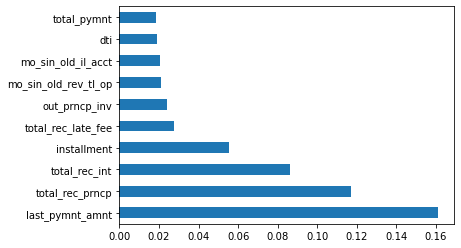

In [25]:
print(dtree.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [26]:
predictions = dtree.predict(X_test)

In [27]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.66      0.59      2351
           1       0.55      0.40      0.46      2351

    accuracy                           0.53      4702
   macro avg       0.54      0.53      0.53      4702
weighted avg       0.54      0.53      0.53      4702

[[1563  788]
 [1403  948]]


In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [29]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train,y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [30]:
pred = lr.predict(X_test)

In [31]:
accuracy = lr.score(X_test, y_test)

In [48]:
print(classification_report(y_test,predictions))
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")
print(f"Accuracy Score: {accuracy}")

              precision    recall  f1-score   support

           0       0.61      0.81      0.69      2351
           1       0.72      0.47      0.57      2351

    accuracy                           0.64      4702
   macro avg       0.66      0.64      0.63      4702
weighted avg       0.66      0.64      0.63      4702

Training Data Score: 0.4839080459770115
Testing Data Score: 0.5552956188855807
Accuracy Score: 0.5744364100382816


In [34]:
predictions = lr.predict(X_test)
pd.DataFrame({"Predictions": predictions, "Actual": y_test})

,Predictions,Actual
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
4697,0,0
4698,1,0
4699,1,0
4700,1,0


In [35]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=600)

In [37]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [49]:
predictions=rfc.predict(X_test)
accuracy = rfc.score(X_test, y_test)

In [75]:
predictions = rfc.predict(X_test)
pd.DataFrame({"Predictions": predictions, "Actual": y_test})

,Predictions,Actual
330,1,1
1119,1,1
3361,0,0
4514,0,0
3425,0,0
...,...,...
12056,0,0
2938,1,1
705,1,1
3419,0,0


In [50]:
print(classification_report(y_test,predictions))
print(f"Training Data Score: {rfc.score(X_train, y_train)}")
print(f"Testing Data Score: {rfc.score(X_test, y_test)}")
print(f"Accuracy Score: {accuracy}")

              precision    recall  f1-score   support

           0       0.61      0.81      0.69      2351
           1       0.72      0.47      0.57      2351

    accuracy                           0.64      4702
   macro avg       0.66      0.64      0.63      4702
weighted avg       0.66      0.64      0.63      4702

Training Data Score: 1.0
Testing Data Score: 0.6418545299872395
Accuracy Score: 0.6418545299872395


In [51]:
print(confusion_matrix(y_test, predictions))

[[1912  439]
 [1245 1106]]


In [52]:
#Scaled Data - LR
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [53]:
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2351
           1       0.76      0.77      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702

[[1786  565]
 [ 529 1822]]
Training Score: 0.708128078817734
Testing Score: 0.767333049766057
Accuracy of model is:  0.767333049766057


In [54]:
target_names = ['high_risk', 'low_risk']

In [55]:
#Scaled Data - Random Forest
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

   high_risk       0.60      0.80      0.68      2351
    low_risk       0.70      0.46      0.55      2351

    accuracy                           0.63      4702
   macro avg       0.65      0.63      0.62      4702
weighted avg       0.65      0.63      0.62      4702

Training Score: 1.0
Testing Score: 0.6299447043811144
Accuracy of model is:  0.6299447043811144


In [56]:
#MERGE DATASETS
frames=[df_2019, df_2020]

In [57]:
df = pd.concat(frames)
df

,loan_amnt,int_rate,installment,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,13375.0,0.1800,483.34,223000.0,1,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,1,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.00,0.0000,483.34,0.0,1.0,0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,0,0,1,0,0,1,0,0
1,21000.0,0.1300,478.68,123000.0,1,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,1,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.00,0.0000,478.68,0.0,1.0,0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,0,0,1,0,0,0,1,0
2,20000.0,0.1200,448.95,197000.0,1,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,1,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.00,0.0000,448.95,0.0,1.0,0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,0,0,1,0,0,0,1,0
3,3000.0,0.1200,100.22,45000.0,1,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,1,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.00,0.0000,85.76,1.0,1.0,0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,0,0,1,1,0,0
4,30000.0,0.1600,1056.49,133000.0,1,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,1,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.00,0.0000,1056.49,0.0,1.0,0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,0,0,15.74,0.0,0.0,20.0,0.0,2

In [58]:
X=df.drop(['loan_status'], axis=1)
y=df['loan_status']

In [59]:
#Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)

In [60]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [61]:
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.737707345971564
Testing Data Score: 0.7311944718657453


In [62]:
lr.score(X, y)

0.7337993128776211

In [63]:
confusion_matrix(y, lr.predict(X))

array([[5643, 2798],
       [1696, 6745]], dtype=int64)

In [64]:
predictions = lr.predict(X_test)
pd.DataFrame({"Predictions": predictions, "Actual": y_test})

,Predictions,Actual
330,1,1
1119,1,1
3361,0,0
4514,1,0
3425,0,0
...,...,...
12056,0,0
2938,1,1
705,1,1
3419,0,0


In [65]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators=600)

In [67]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [68]:
predictions=rfc.predict(X_test)

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      5055
           1       0.77      0.80      0.79      5075

    accuracy                           0.78     10130
   macro avg       0.78      0.78      0.78     10130
weighted avg       0.78      0.78      0.78     10130



In [70]:
print(confusion_matrix(y_test, predictions))

[[3877 1178]
 [1031 4044]]


In [71]:
#Scaled Data - LR
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [76]:
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      5055
           1       0.71      0.79      0.75      5075

    accuracy                           0.73     10130
   macro avg       0.73      0.73      0.73     10130
weighted avg       0.73      0.73      0.73     10130

[[3415 1640]
 [1079 3996]]
Training Score: 0.7397808056872038
Testing Score: 0.7315893385982231
Accuracy of model is:  0.7315893385982231


In [77]:
#Scaled Data - Random Forest
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

   high_risk       0.78      0.77      0.78      5055
    low_risk       0.77      0.79      0.78      5075

    accuracy                           0.78     10130
   macro avg       0.78      0.78      0.78     10130
weighted avg       0.78      0.78      0.78     10130

Training Score: 1.0
Testing Score: 0.7779861796643632
Accuracy of model is:  0.7779861796643632


In [74]:
y_true = y_test
confusion_matrix(y_true, y_pred)

array([[3891, 1164],
       [1085, 3990]], dtype=int64)